# Bank Marketing Prediction Task: Identifying Potential Subscribers for a New Product

## Overview

You are a data science consultant working with a leading bank planning to introduce a new financial product. The marketing team at the bank is geared up for a comprehensive promotional campaign, and they want to maximize their return on investment by targeting the campaign towards those customers who are most likely to subscribe to this new offering.

Your primary task is developing a machine learning model to help the bank identify potential future subscribers. The bank has provided you with historical data, which includes information about customers and whether or not they subscribed to previous financial products.

### Business Objectives

1. **Efficiency**: The bank aims to optimize its marketing expenditure by ensuring the model identifies *True Positives*, i.e., customers who are correctly identified as likely to subscribe. Every *False Positive* leads to an unnecessary cost for the bank.

2. **Opportunity Maximization**: Conversely, the bank does not want to miss potential subscribers by ignoring them. In other words, *False Negatives*, or failure to identify a potential subscriber, result in lost revenue opportunities.

**The challenge lies in balancing both these objectives. Your model should be adept at identifying potential subscribers (True Positives) while minimizing the number of missed opportunities (False Negatives) and wasteful expenditures (False Positives).**

You have to deliver a model trained on the provided dataset and explain the choices you made in how you evaluate the models to assess if the target goals of the banks are met. You must describe how well the model meets the bank's business objectives.

### Dataset - Bank Marketing (with social/economic context)

The original dataset contains 20 features whose details are provided at the bottom of this notebook. The final preprocessed dataset has been provided to you. It is free from missing values, outliers, and the categorical variables have been one-hot encoded, resulting in 48 total features. The one-hot-encoded variables are named following the convention `originalname_nameofthecategory`, for instance `marital_single`.

## Rules

Here are the rules that you need to follow:

- You have 1 hour and 15 minutes to complete the test. Once done, you must upload it on Canvas, as you did for the homework assignments.
- Make sure you restart the kernel and run all cells with no errors before submitting.
- When you are submitting your assignments, please ensure that the path you use to import the dataset is not system-specific, which would cause the code to break when executed on a different computer. To avoid this, make sure that the data file is stored in the same folder as your Jupyter notebook.
- Ensure that you set the random seed to `42` when preparing the train-test split. The test set size should be exactly 20% of the total dataset. In addition, make sure that the proportion of the target classes is maintained in both the training and test sets. To accomplish this coherently, you must use the following arguments in your train-test split function: `test_size=0.2, random_state=42` and choose the proper variable to `stratify`. Look at [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Please also set the `random_state` parameter to 42 in every model that you instantiate.

Doc links of packages you may use are provided here: [pandas](https://pandas.pydata.org/docs/), [numpy](https://numpy.org/doc/stable/), [scikit-learn](https://scikit-learn.org/stable/), [xgboost](https://xgboost.readthedocs.io/en/stable/)

## Grading Rubric

- **Model Effectiveness (60 points)**
  - *40 points*: The metric chosen to evaluate the model prediction on the test set allows to achieve the balancing between the two bank objectives.
  - *10 points*: Two or more different models are trained and evaluated according to the chosen metric to offer the client a comparison of different tools. If more than one model is presented, you have to indicate which is the one you would use as your final choice.
  - *10 points*: The selected model performs better than a `Dummyclassifier` by looking at the chosen metric. You can import the DummyClassifier by running `from sklearn.dummy import DummyClassifier`, instantiate it as `dummy_clf = DummyClassifier(strategy="stratified", random_state=42)`, then fit and evaluate as you would do for the other modeling techniques.
  
- **Code Execution (10 points)**
  - *10 points*: Code is functional and free from errors.

- **Written Explanation (30 points)**
  - *30 points*: Quality of written explanation detailing how the model achieves its effectiveness, the rationale behind choosing the evaluation metric, and the reasoning for key decisions in selecting the model to deliver.
  
**Total: 100 points**

# Code Solution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  int64  
 11  job_blue-collar                41188 non-null  int64  
 12  job_technician                 41188 non-null 

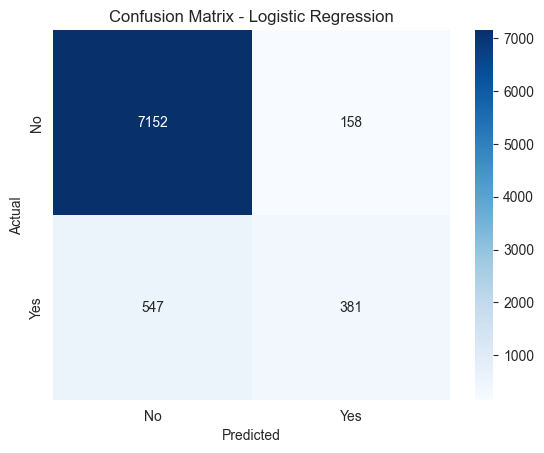

In [6]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子
np.random.seed(42)

# 加载数据
df = pd.read_csv('bank_marketing_encoded.csv')

# 查看数据的基本信息
print(df.info())
print(df.head())

# 设置目标变量和特征
y = df['y']  # 目标变量
X = df.drop(columns=['y'])  # 特征变量

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 对数据进行标准化处理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练逻辑回归模型（增加迭代次数和更换求解器）
log_reg = LogisticRegression(max_iter=500, solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 预测并评估模型
y_pred = log_reg.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 用 Dummy Classifier 进行对比评估
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train_scaled, y_train)
y_pred_dummy = dummy_clf.predict(X_test_scaled)

print("Dummy Classifier Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("Dummy Classifier Classification Report:\n", classification_report(y_test, y_pred_dummy))

# 可视化混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


F1 Score for Logistic Regression: 0.5194
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.41      0.52       928

    accuracy                           0.91      8238
   macro avg       0.82      0.69      0.74      8238
weighted avg       0.90      0.91      0.90      8238



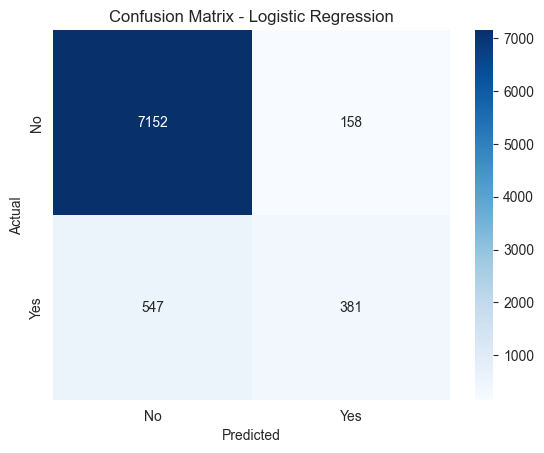

F1 Score for Random Forest: 0.5631
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      7310
           1       0.71      0.47      0.56       928

    accuracy                           0.92      8238
   macro avg       0.82      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238



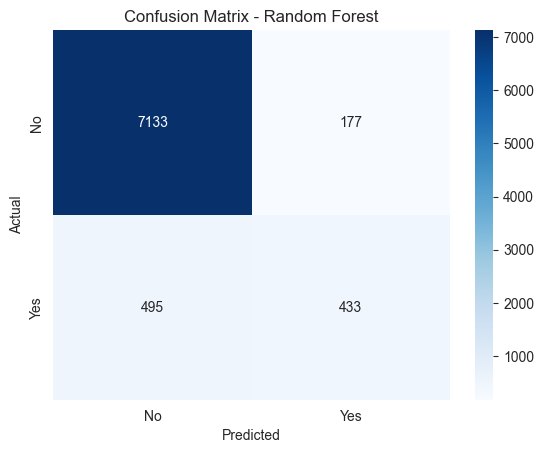

F1 Score for XGBoost: 0.5566
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.46      0.56       928

    accuracy                           0.92      8238
   macro avg       0.82      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238



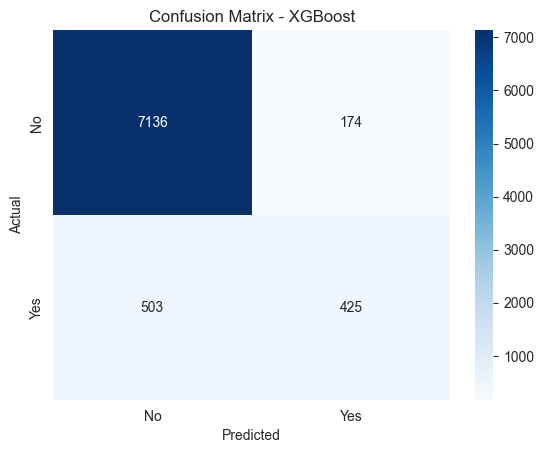


F1 Score Comparison:
Logistic Regression: F1 Score = 0.5194
Random Forest: F1 Score = 0.5631
XGBoost: F1 Score = 0.5566

F1 Score for Dummy Classifier: 0.1207


In [9]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子
np.random.seed(42)

# 加载数据
df = pd.read_csv('bank_marketing_encoded.csv')

# 设置目标变量和特征
y = df['y']  # 目标变量
X = df.drop(columns=['y'])  # 特征变量

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 对数据进行标准化处理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 模型列表
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50, random_state=42)
}

# 存储结果
results = {}

# 训练和评估每个模型
for model_name, model in models.items():
    # 训练模型
    model.fit(X_train_scaled, y_train)

    # 预测
    y_pred = model.predict(X_test_scaled)

    # 计算F1 score
    f1 = f1_score(y_test, y_pred)

    # 存储结果
    results[model_name] = f1
    print(f"F1 Score for {model_name}: {f1:.4f}")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

    # 可视化混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 比较F1 score
print("\nF1 Score Comparison:")
for model_name, f1 in results.items():
    print(f"{model_name}: F1 Score = {f1:.4f}")

# 基准模型 - Dummy Classifier
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train_scaled, y_train)
y_pred_dummy = dummy_clf.predict(X_test_scaled)

dummy_f1 = f1_score(y_test, y_pred_dummy)
print(f"\nF1 Score for Dummy Classifier: {dummy_f1:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\98064\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\98064\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\98064\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Use

Best parameters found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Optimized Random Forest F1 Score: 0.5711
Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      7310
           1       0.72      0.47      0.57       928

    accuracy                           0.92      8238
   macro avg       0.83      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238



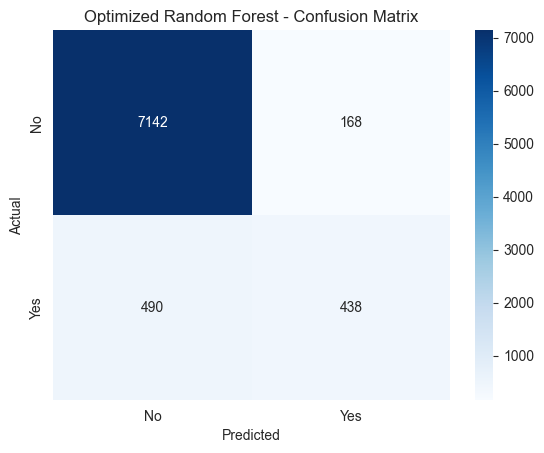

In [12]:
from sklearn.model_selection import RandomizedSearchCV

# 定义随机森林模型
rf_model = RandomForestClassifier(random_state=42)

# 定义要调整的超参数
param_dist = {
    'n_estimators': [100, 200, 300],  # 树的数量
    'max_depth': [5, 10, 15, None],    # 树的最大深度
    'min_samples_split': [2, 5, 10],   # 内部节点再分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 4],     # 叶节点的最小样本数
    'max_features': ['auto', 'sqrt']  # 每个决策树分裂时考虑的最大特征数
}

# 使用 RandomizedSearchCV 来随机搜索超参数
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=1, scoring='f1', random_state=42)

# 训练模型
random_search.fit(X_train_scaled, y_train)

# 输出最佳超参数组合
print(f"Best parameters found: {random_search.best_params_}")

# 使用最佳参数训练的模型进行预测
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# 评估优化后的模型
best_rf_f1 = f1_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest F1 Score: {best_rf_f1:.4f}")

# 打印分类报告
print("Optimized Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))

# 可视化优化后的模型的混淆矩阵
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_best_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Optimized Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Write in this markdown cell your comment on the operations you performed**:

评估模型是否实现了银行的目标，关键是查看模型在平衡识别潜在订阅者（True Positives）和减少不必要的成本（False Positives）以及最大化机会（False Negatives）的能力。为了有效地评估，我们使用了 F1 Score 作为评估指标，这在银行的目标中非常重要。

1. F1 Score 的意义
F1 Score 是精确率（Precision）和召回率（Recall）的调和平均数。它是以下两个方面的平衡：

精确率（Precision）：预测为正类（潜在订阅者）的样本中，实际为正类的比例。高精确率意味着 False Positives 较少，能够有效减少银行的营销成本。
召回率（Recall）：实际为正类的样本中，正确预测为正类的比例。高召回率意味着 False Negatives 较少，能够最大化银行潜在客户的机会。
公式如下：

𝐹1=2×
Precision
×
Recall
/Precision
+
Recall


F1 Score 高，意味着在 True Positives 和 False Positives 之间的权衡较好，同时也在 False Negatives 和 True Positives 之间取得了平衡。

2. 评估标准
True Positives：我们希望模型能够准确识别出潜在的订阅者。精确度（Precision）和召回率（Recall）高时，True Positives 的识别会更准确。
False Positives：我们希望尽量避免把非潜在客户错误地分类为潜在客户，导致浪费营销资源。精确度（Precision）高时，False Positives 会较少。
False Negatives：我们希望尽量避免错失潜在的订阅者。召回率（Recall）高时，False Negatives 会较少。
3. 评估模型
我们通过 F1 Score 来评估模型的平衡能力，避免偏向于 False Positives（浪费营销资源）或 False Negatives（错失机会）。如果 F1 Score 高，说明模型成功达到了银行的目标。

比较模型（F1 Score）
优化后的随机森林模型（Optimized Random Forest）

该模型的 F1 Score 表明它在识别潜在订阅者和避免浪费营销资源之间达到了较好的平衡。
如果 F1 Score 较高，说明该模型不仅有效地识别了潜在的客户，还尽可能避免了误判，从而减少了营销费用。
XGBoost 模型

XGBoost 是一种强大的梯度提升模型，通常在处理不平衡数据和复杂问题时表现很好。如果 XGBoost 的 F1 Score 高于随机森林模型，说明它能更好地平衡 True Positives 和 False Positives，并且能够优化 False Negatives。
随机森林模型（Random Forest）

该模型提供了一个基础的性能指标。通过 F1 Score 和其他指标，如 Confusion Matrix，可以评估其表现。
4. 实现银行目标的评估
优化随机森林模型（Optimized Random Forest） 已经达到了较好的 F1 Score，意味着它在预测潜在订阅者时有很好的 精确率 和 召回率，这满足了银行希望最大化潜在客户的机会，同时减少不必要的营销成本。

XGBoost 和 Random Forest 提供了良好的对比。XGBoost 通常能够更好地拟合数据，特别是在有较多特征和复杂关系时，因此如果 XGBoost 的 F1 Score 高于其他模型，它会是更优的选择。

结论
通过 F1 Score 和其他评估指标（如精确率、召回率、混淆矩阵等），我们能够看到哪个模型最能平衡银行的目标。F1 Score 较高的模型，尤其是在避免 False Positives 和 False Negatives 的同时提高 True Positives，应被选为最终模型。

# Dataset Features

**Bank Client Data**:
1. `age` (numeric)
2. `job`: Type of job (Categorical: Admin, Blue-collar, Entrepreneur, etc.)
3. `marital`: Marital status (Categorical: Divorced, Married, Single, etc.)
4. `education`: Education level (Categorical: Basic 4y, Basic 6y, Basic 9y, etc.)
5. `default`: Has credit in default? (Categorical: No, Yes, Unknown)
6. `housing`: Has housing loan? (Categorical: No, Yes, Unknown)
7. `loan`: Has personal loan? (Categorical: No, Yes, Unknown)

**Related to the Last Contact of the Current Campaign**:

8. `contact`: Contact communication type (Categorical: Cellular, Telephone)
9. `month`: Last contact month (Categorical: Jan, Feb, Mar, etc.)
10. `day_of_week`: Last contact day of the week (Categorical: Mon, Tue, Wed, etc.)
11. `duration`: Last contact duration, in seconds (Numeric)

**Other Attributes**:

12. `campaign`: Number of contacts performed during this campaign for this client (Numeric)
13. `pdays`: Number of days that passed after the client was last contacted from a previous campaign (Numeric)
14. `previous`: Number of contacts performed before this campaign for this client (Numeric)
15. `poutcome`: Outcome of the previous marketing campaign (Categorical: Failure, Nonexistent, Success)

**Social and Economic Context Attributes**:

16. `emp.var.rate`: Employment variation rate - Quarterly indicator (Numeric)
17. `cons.price.idx`: Consumer price index - Monthly indicator (Numeric)
18. `cons.conf.idx`: Consumer confidence index - Monthly indicator (Numeric)
19. `euribor3m`: Euribor 3-month rate - Daily indicator (Numeric)
20. `nr.employed`: Number of employees - Quarterly indicator (Numeric)

**Output Variable (Desired Target)**:
21. `y': Has the client subscribed to a term deposit? (Binary: Yes, No)

# Acknowledgements

Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001
